# 4. Re-run the original model with log-differenced original data
(not PPP-adjusted)

In [1]:
from IPython.display import display, HTML
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
import pandas as pd
import seaborn as sns
sns.set(style='ticks', rc={'axes.grid':True,
                           'xtick.labelsize': 'medium',
                           'ytick.labelsize': 'medium',
#                            'font.size': 15,
                          })

analysis_dir = os.getcwd()
assert analysis_dir.endswith(os.path.join('em-2020','analysis'))
plot_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'tex', 'plots'))
data_dir = os.path.realpath(os.path.join(analysis_dir, '..', 'data'))

In [2]:
suppressMessages({
library(lavaan)
library(semPlot)
library(semTools)
library(MVN)
library(Hmisc)
library(data.table)
library(dplyr)
library(tseries)
})

In [3]:
%get data_dir --from em-2020
cols <- c('year', 'ISG', 'TO', 'TI', 'P_GDP', 'EI')
data.raw <- read.csv(file.path(data_dir, 'WB_BGD_current.csv'))[cols]

log_cols <- c('EI', 'P_GDP', 'TI')
data.log <- copy(data.raw)
data.log[log_cols] <- log(data.raw[log_cols])
data.logdiff <- cbind(data.raw[-1,'year', drop=FALSE], diff(as.matrix(subset(data.log, select=-year))))

data <- subset(data.raw, year >= 1990 & year <= 2015)
data.log <- subset(data.log, year >= 1990 & year <= 2015)
data.logdiff <- subset(data.logdiff, year >= 1990 & year <= 2015)

data.logdiff

,year,ISG,TO,TI,P_GDP,EI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
31,1990,0.358918934,0.64132799,0.000000000,0.069068355,-0.042025491
32,1991,0.973878700,-0.07667513,0.045256592,-0.043742881,0.006077837
33,1992,0.598385998,1.04417862,0.354016546,0.001651597,0.030042186
34,1993,1.216365518,3.18757757,-0.408575531,0.023261722,0.009378746
35,1994,0.535736376,-0.25571852,0.179201429,-0.003408544,0.025496487
36,1995,0.110832024,5.34363152,0.568504735,0.095121204,-0.032136731
37,1996,-1.896907879,-2.13340835,-0.390097078,0.180824324,-0.196222866
38,1997,0.178753522,0.24942567,0.075507553,0.017034017,0.005531040
39,1998,0.798072276,1.55455001,0.269332934,0.014662869,0.006160635


In [4]:
summary(lm('TI ~ ISG', data=data.logdiff))


Call:
lm(formula = "TI ~ ISG", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48927 -0.08397 -0.00542  0.10014  0.53059 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.03362    0.04472   0.752    0.459
ISG          0.03869    0.06921   0.559    0.581

Residual standard error: 0.207 on 24 degrees of freedom
Multiple R-squared:  0.01286,	Adjusted R-squared:  -0.02828 
F-statistic: 0.3126 on 1 and 24 DF,  p-value: 0.5813


In [5]:
summary(lm('P_GDP ~ TO', data=data.logdiff))


Call:
lm(formula = "P_GDP ~ TO", data = data.logdiff)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10237 -0.04092  0.00433  0.04387  0.11820 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.058479   0.011458   5.104  3.2e-05 ***
TO          -0.001944   0.003579  -0.543    0.592    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.056 on 24 degrees of freedom
Multiple R-squared:  0.01215,	Adjusted R-squared:  -0.02901 
F-statistic: 0.2951 on 1 and 24 DF,  p-value: 0.592


In [6]:
summary(lm('EI ~ ISG + TO + TI + P_GDP', data=data.logdiff))


Call:
lm(formula = "EI ~ ISG + TO + TI + P_GDP", data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.052516 -0.015500 -0.000254  0.010950  0.055404 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.011467   0.009453   1.213    0.239    
ISG          0.009589   0.010096   0.950    0.354    
TO           0.001630   0.001683   0.968    0.345    
TI           0.029927   0.025626   1.168    0.257    
P_GDP       -0.835760   0.112324  -7.441 3.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02471 on 20 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8433,	Adjusted R-squared:  0.812 
F-statistic: 26.91 on 4 and 20 DF,  p-value: 8.424e-08


In [7]:
model.path <- '
## path model
EI ~ p_ei_isg*ISG + p_ei_to*TO + p_ei_ti*TI + p_ei_pgdp*P_GDP
TI ~ p_ti_isg*ISG
P_GDP ~ p_pgdp_to*TO
## indirect effect
p_ei_ti_isg := p_ei_ti*p_ti_isg
p_ei_pgdp_to := p_ei_pgdp*p_pgdp_to
## total effect
p_ei_isg_total := p_ei_isg + (p_ei_ti*p_ti_isg)
p_ei_to_total := p_ei_to + (p_ei_pgdp*p_pgdp_to)
'

capture <- function(expr, file) {
    writeLines(c('\\begin{verbatim}', 
                 capture.output(expr),
                 '\\end{verbatim}'), con=file)
}
model.path.fit <- sem(model.path, data=data.logdiff, estimator='MLR', missing='ML', meanstructure=TRUE, em.fx.tol=1e-6)
# capture(summary(model.path.fit, standardized=TRUE, header=TRUE,  fit.measures=TRUE, estimates=FALSE),
#         '../tex/plots/model.logdiff.fit.summary.tex')
# capture(summary(model.path.fit, standardized=TRUE, header=FALSE, estimates=TRUE),
#         '../tex/plots/model.logdiff.fit.estimates.tex')
summary(model.path.fit, standardized=TRUE, fit.measures=TRUE)

lavaan 0.6-5 ended normally after 69 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         12
                                                      
  Number of observations                            26
  Number of missing patterns                         2
                                                      
Model Test User Model:
                                              Standard      Robust
  Test Statistic                                 8.864      13.153
  Degrees of freedom                                 3           3
  P-value (Chi-square)                           0.031       0.004
  Scaling correction factor                                  0.674
    for the Yuan-Bentler correction (Mplus variant) 

Model Test Baseline Model:

  Test statistic                                55.853      54.343
  Degrees of freedom                                 9     

In [8]:
soln.std <- as.data.frame(standardizedSolution(model.path.fit, se=TRUE, type='std.all', remove.def=FALSE))
fit.measures <- as.data.frame(fitMeasures(model.path.fit))
r.square <- lavInspect(model.path.fit, 'rsquare')
n.x <- 3

In [9]:
%get soln.std --from R
%get r.square --from R
%get fit.measures --from R
display(np.round(soln_std, 3))
display(r_square)

Variable soln.std is put to SoS as soln_std
Variable r.square is put to SoS as r_square
Variable fit.measures is put to SoS as fit_measures


,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
0,EI,~,ISG,0.108,0.102,1.063,0.288,-0.091,0.307
1,EI,~,TO,0.096,0.074,1.302,0.193,-0.049,0.241
2,EI,~,TI,0.115,0.085,1.351,0.177,-0.052,0.282
3,EI,~,P_GDP,-0.869,0.040,-21.968,0.000,-0.946,-0.791
4,TI,~,ISG,0.113,0.305,0.372,0.710,-0.484,0.711
5,P_GDP,~,TO,-0.110,0.188,-0.587,0.558,-0.478,0.258
6,EI,~~,EI,0.180,0.063,2.876,0.004,0.057,0.303
7,TI,~~,TI,0.987,0.069,14.278,0.000,0.852,1.123
8,P_GDP,~~,P_GDP,0.988,0.041,23.851,0.000,0.907,1.069
9,ISG,~~,ISG,1.000,0.000,NaN,NaN,1.000,1.000


EI       0.819747
TI       0.012856
P_GDP    0.012146
dtype: float64

In [10]:
df = soln_std.query('(lhs != rhs) & (op == "~")').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
df = df.loc[['TI ~ ISG', 'P_GDP ~ TO', 'EI ~ ISG', 'EI ~ TO', 'EI ~ TI', 'EI ~ P_GDP']]
df['Equation'] = ['1', '2', '3', '', '', '']
df['Dep. var.'] = df.lhs.str.replace('P_GDP', r'P\_GDP')
df['Ind. var.'] = df.rhs.str.replace('P_GDP', r'P\_GDP')
df['Coefficient'] = ('$P_{' + df.lhs + ',' + df.rhs + '}$').str.replace('P_GDP', r'P\_GDP')
df['Est. (std.)'] = np.round(df['est.std'],3)
df['S.E. (std.)'] = np.round(df['se'],3)
df['p-value'] = ['{:.3f}'.format(x) if x >= 0.001 else '*' for x in df['pvalue']]
df['$R^{2}$'] = ''
df['$R^{2}$'].iloc[0:3] = ['{:.3f}'.format(x) for x in r_square.loc[['TI', 'P_GDP', 'EI']]]
df = df[['Equation', 
         'Dep. var.', 'Ind. var.', 
         'Coefficient', 'Est. (std.)', 'S.E. (std.)', 'p-value', '$R^{2}$']]
display(df)
print(df.to_latex(escape=False, index=False))

/home/drake/.virtualenvs/em-2020/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Equation,Dep. var.,Ind. var.,Coefficient,Est. (std.),S.E. (std.),p-value,$R^{2}$
TI ~ ISG,1,TI,ISG,"$P_{TI,ISG}$",0.113,0.305,0.710,0.013
P_GDP ~ TO,2,P\_GDP,TO,"$P_{P\_GDP,TO}$",-0.110,0.188,0.558,0.012
EI ~ ISG,3,EI,ISG,"$P_{EI,ISG}$",0.108,0.102,0.288,0.820
EI ~ TO,,EI,TO,"$P_{EI,TO}$",0.096,0.074,0.193,
EI ~ TI,,EI,TI,"$P_{EI,TI}$",0.115,0.085,0.177,
EI ~ P_GDP,,EI,P\_GDP,"$P_{EI,P\_GDP}$",-0.869,0.040,*,


\begin{tabular}{llllrrll}
\toprule
Equation & Dep. var. & Ind. var. &      Coefficient &  Est. (std.) &  S.E. (std.) & p-value & $R^{2}$ \\
\midrule
       1 &        TI &       ISG &     $P_{TI,ISG}$ &        0.113 &        0.305 &   0.710 &   0.013 \\
       2 &    P\_GDP &        TO &  $P_{P\_GDP,TO}$ &       -0.110 &        0.188 &   0.558 &   0.012 \\
       3 &        EI &       ISG &     $P_{EI,ISG}$ &        0.108 &        0.102 &   0.288 &   0.820 \\
         &        EI &        TO &      $P_{EI,TO}$ &        0.096 &        0.074 &   0.193 &         \\
         &        EI &        TI &      $P_{EI,TI}$ &        0.115 &        0.085 &   0.177 &         \\
         &        EI &    P\_GDP &  $P_{EI,P\_GDP}$ &       -0.869 &        0.040 &       * &         \\
\bottomrule
\end{tabular}



In [11]:
df = soln_std.query('(lhs != rhs) & (op in ["~", ":="])').copy()
df.index = np.where(df.op == '~', df.lhs.str.cat([df.op, df.rhs], sep=' '), df.lhs)
display(np.round(df, 3))
out = pd.DataFrame({'Causal variable': ['ISG', 'TO', 'TI', 'P\_GDP'], 
                    'DE coeff.': np.nan, 'DE s.e.': np.nan, 'DE p-value': np.nan,
                    'IE coeff.': np.nan, 'IE s.e.': np.nan, 'IE p-value': np.nan,
                    'TE coeff.': np.nan, 'TE s.e.': np.nan, 'TE p-value': np.nan})
out.iloc[0:4, 1:4] = df.iloc[0:4, [3,4,6]].values
out.iloc[0:2, 4:7] = df.iloc[6:8, [3,4,6]].values
out.iloc[0:2, 7:10] = df.iloc[8:10, [3,4,6]].values
out.iloc[2:4, 7:10] = df.iloc[2:4, [3,4,6]].values
f3 = lambda x: '{:.3f}'.format(x) if np.isfinite(x) else ''
out.iloc[:, [1,2,4,5,7,8]] = out.iloc[:, [1,2,4,5,7,8]].applymap(f3)
f3p = lambda x: '{:.3f}'.format(x) if x >= 0.001 else '*' if np.isfinite(x) else ''
out.iloc[:, [3,6,9]] = out.iloc[:, [3,6,9]].applymap(f3p)
display(out)
print(out.to_latex(escape=False, index=False))

,lhs,op,rhs,est.std,se,z,pvalue,ci.lower,ci.upper
EI ~ ISG,EI,~,ISG,0.108,0.102,1.063,0.288,-0.091,0.307
EI ~ TO,EI,~,TO,0.096,0.074,1.302,0.193,-0.049,0.241
EI ~ TI,EI,~,TI,0.115,0.085,1.351,0.177,-0.052,0.282
EI ~ P_GDP,EI,~,P_GDP,-0.869,0.040,-21.968,0.000,-0.946,-0.791
TI ~ ISG,TI,~,ISG,0.113,0.305,0.372,0.710,-0.484,0.711
P_GDP ~ TO,P_GDP,~,TO,-0.110,0.188,-0.587,0.558,-0.478,0.258
p_ei_ti_isg,p_ei_ti_isg,:=,p_ei_ti*p_ti_isg,0.013,0.039,0.333,0.740,-0.064,0.090
p_ei_pgdp_to,p_ei_pgdp_to,:=,p_ei_pgdp*p_pgdp_to,0.096,0.162,0.593,0.553,-0.221,0.412
p_ei_isg_total,p_ei_isg_total,:=,p_ei_isg+(p_ei_ti*p_ti_isg),0.121,0.123,0.981,0.327,-0.121,0.363
p_ei_to_total,p_ei_to_total,:=,p_ei_to+(p_ei_pgdp*p_pgdp_to),0.192,0.190,1.010,0.312,-0.180,0.564


,Causal variable,DE coeff.,DE s.e.,DE p-value,IE coeff.,IE s.e.,IE p-value,TE coeff.,TE s.e.,TE p-value
0,ISG,0.108,0.102,0.288,0.013,0.039,0.740,0.121,0.123,0.327
1,TO,0.096,0.074,0.193,0.096,0.162,0.553,0.192,0.190,0.312
2,TI,0.115,0.085,0.177,,,,0.115,0.085,0.177
3,P\_GDP,-0.869,0.040,*,,,,-0.869,0.040,*


\begin{tabular}{llllllllll}
\toprule
Causal variable & DE coeff. & DE s.e. & DE p-value & IE coeff. & IE s.e. & IE p-value & TE coeff. & TE s.e. & TE p-value \\
\midrule
            ISG &     0.108 &   0.102 &      0.288 &     0.013 &   0.039 &      0.740 &     0.121 &   0.123 &      0.327 \\
             TO &     0.096 &   0.074 &      0.193 &     0.096 &   0.162 &      0.553 &     0.192 &   0.190 &      0.312 \\
             TI &     0.115 &   0.085 &      0.177 &           &         &            &     0.115 &   0.085 &      0.177 \\
         P\_GDP &    -0.869 &   0.040 &          * &           &         &            &    -0.869 &   0.040 &          * \\
\bottomrule
\end{tabular}



In [12]:
fit_table = fit_measures.loc[['pvalue.scaled', 'rmsea.robust', 'cfi.robust', 'srmr']]
fit_table.index = [r'$\chi^2$', 'RMSEA', 'CFI', 'SRMR']
fit_table.columns = ['value']
fit_table['cut-off'] = ['$> 0.05$', '$<0.08$', '$\geq 0.90$', '$<0.08$']
display(np.round(fit_table, 3))
print(np.round(fit_table, 3).to_latex(escape=False))

,value,cut-off
$\chi^2$,0.004,$> 0.05$
RMSEA,0.296,$<0.08$
CFI,0.853,$\geq 0.90$
SRMR,0.161,$<0.08$


\begin{tabular}{lrl}
\toprule
{} &  value &      cut-off \\
\midrule
$\chi^2$ &  0.004 &     $> 0.05$ \\
RMSEA    &  0.296 &      $<0.08$ \\
CFI      &  0.853 &  $\geq 0.90$ \\
SRMR     &  0.161 &      $<0.08$ \\
\bottomrule
\end{tabular}



      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.4813130 -0.0000001  0.0000000  0.0014377  0.0502748  0.3913814 

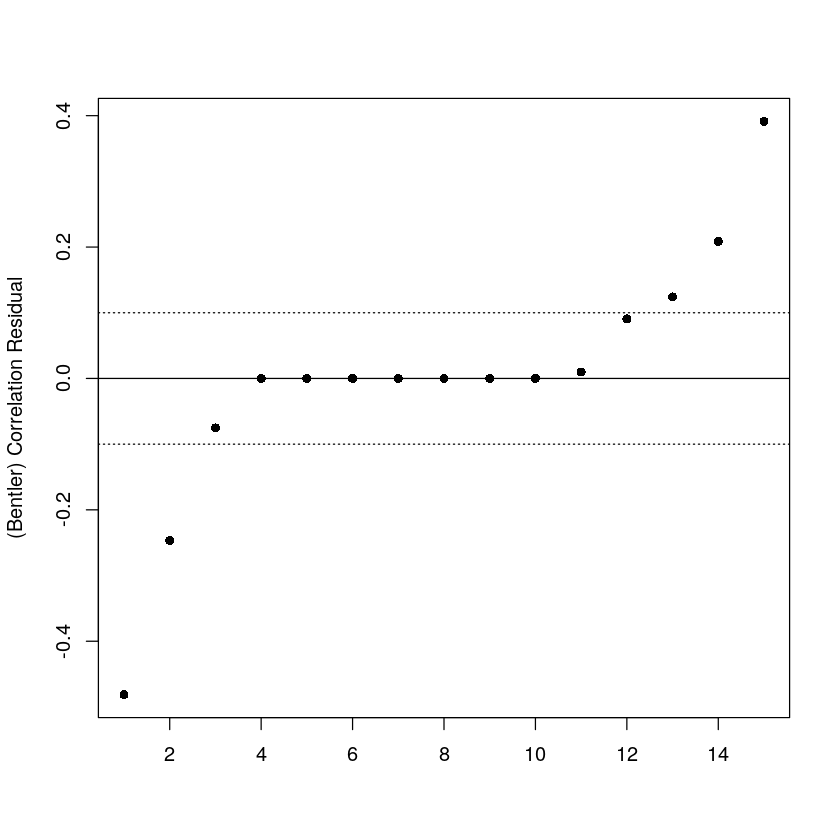

In [13]:
# Extract unique correlation residuals
model.path.fit.resid <- as.data.frame(resid(model.path.fit, type='cor.bentler')$cov)
resid <- model.path.fit.resid[lower.tri(model.path.fit.resid, diag=TRUE)]

summary(resid)

plot(resid[order(resid)], pch=16, xlab='', ylab='(Bentler) Correlation Residual')
abline(h=c(0, -.1, .1), lty=c(1,3,3))

In [14]:
%get model.path.fit.resid --from R
def plot_corr_resid(corr, figsize=None, **kwargs):
    mask = 1 - np.tril(np.ones_like(corr, dtype=np.bool))
    corr_text = np.vectorize('{:.3f}'.format)(corr)
    if figsize is None:
        figsize=np.array([1, 0.75]) * corr.shape[0] + np.array([kwargs.get('cbar', True) * 1.5, 0])
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(10, 10, s=50, l=75, sep=100, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=corr_text, fmt='', mask=mask, cmap=cmap, vmin=-0.1, vmax=0.1, 
                square=False, linewidths=.25, **kwargs)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'verticalalignment': 'center'})

def save_fig(file, **kwargs):
    path = os.path.join(plot_dir, file)
    plt.savefig(path, metadata={'CreationDate': None})

Variable model.path.fit.resid is put to SoS as model_path_fit_resid


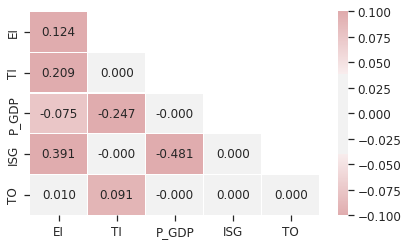

In [15]:
plot_corr_resid(model_path_fit_resid)
# save_fig('updated_correlation_residuals.pdf')


Call:
lm(formula = data.logdiff$ISG ~ resid)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54372 -0.30269  0.09198  0.32052  0.95838 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.2709     0.1048   2.586   0.0162 *
resid        -5.2805     1.9474  -2.712   0.0122 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5342 on 24 degrees of freedom
Multiple R-squared:  0.2345,	Adjusted R-squared:  0.2026 
F-statistic: 7.352 on 1 and 24 DF,  p-value: 0.01218


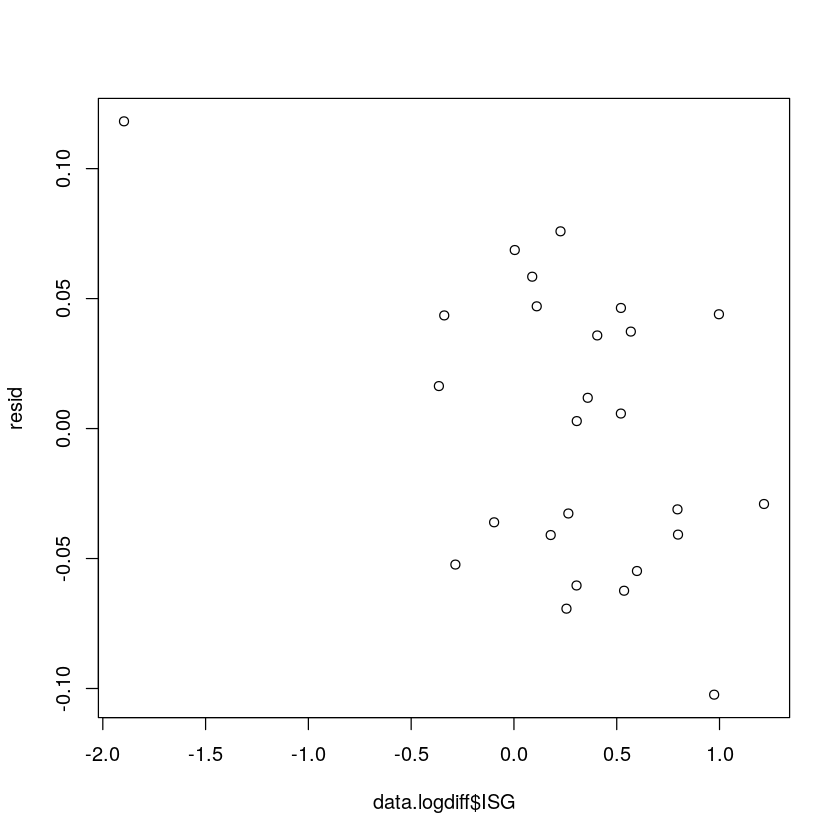

In [16]:
resid <- residuals_lavaan(model.path.fit)$P_GDP
summary(lm(data.logdiff$ISG ~ resid))
plot(data.logdiff$ISG, resid)


Call:
lm(formula = P_GDP ~ ISG, data = data.logdiff)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.077368 -0.042923  0.006152  0.032519  0.083041 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06930    0.01051   6.592  8.1e-07 ***
ISG         -0.04649    0.01627  -2.858  0.00868 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04866 on 24 degrees of freedom
Multiple R-squared:  0.2539,	Adjusted R-squared:  0.2228 
F-statistic: 8.166 on 1 and 24 DF,  p-value: 0.008681


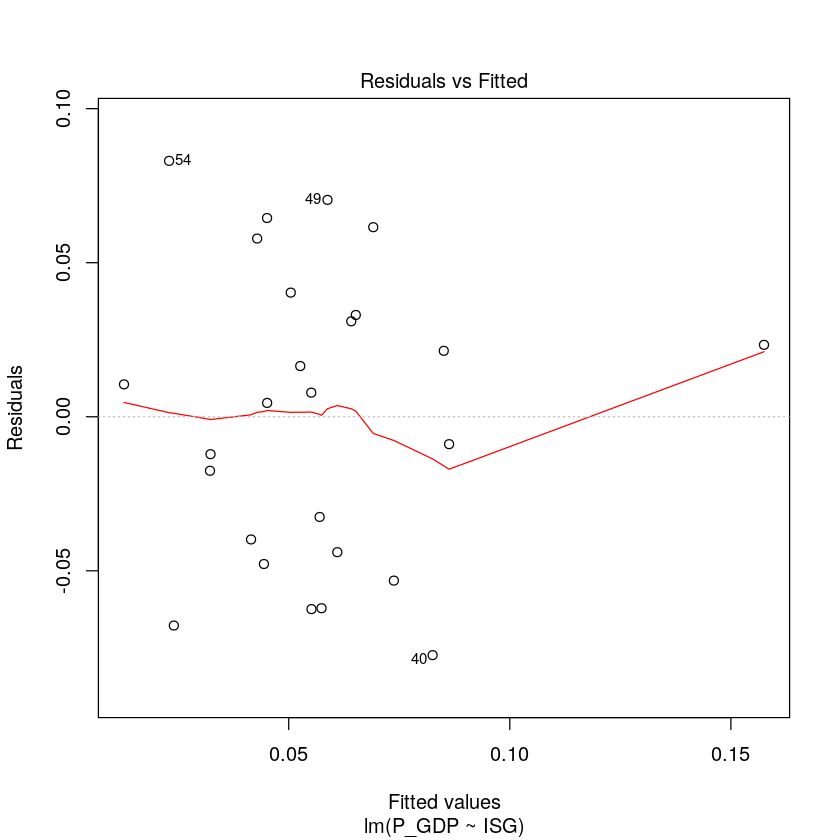

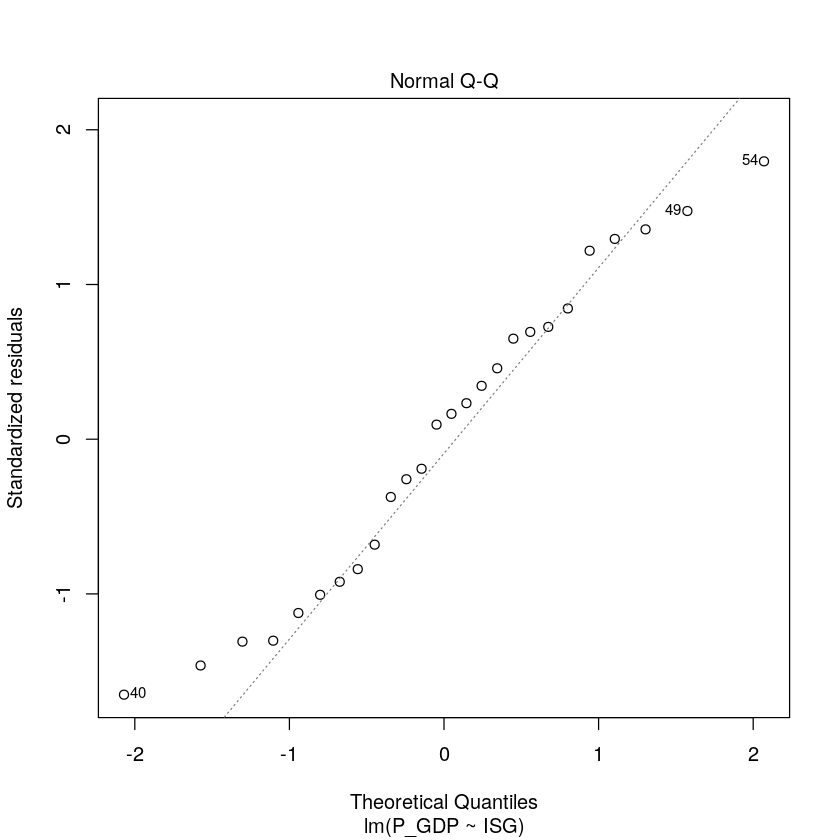

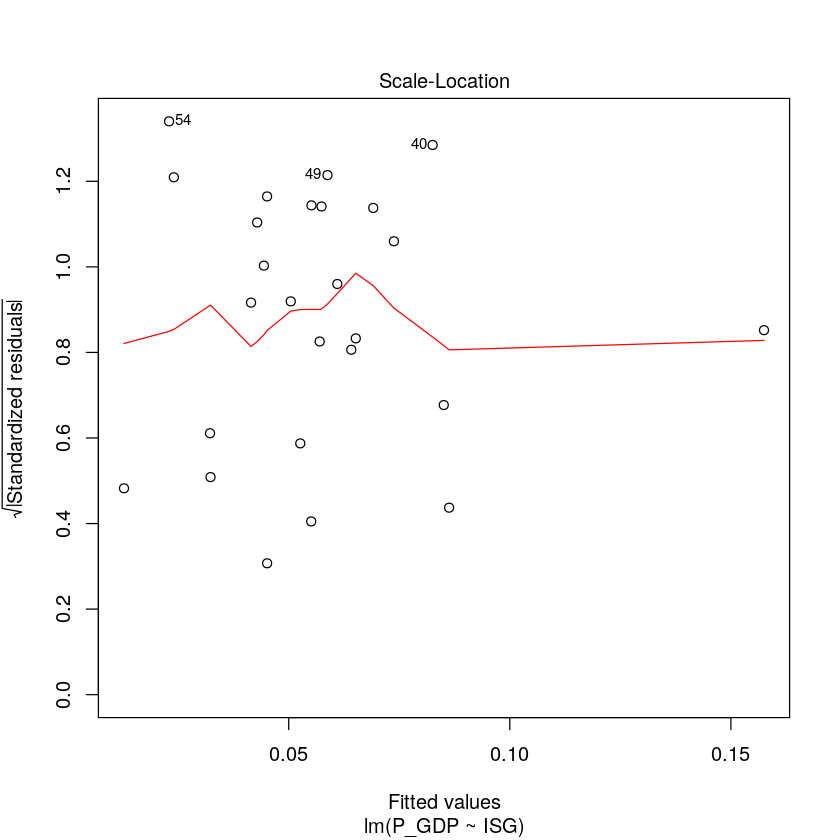

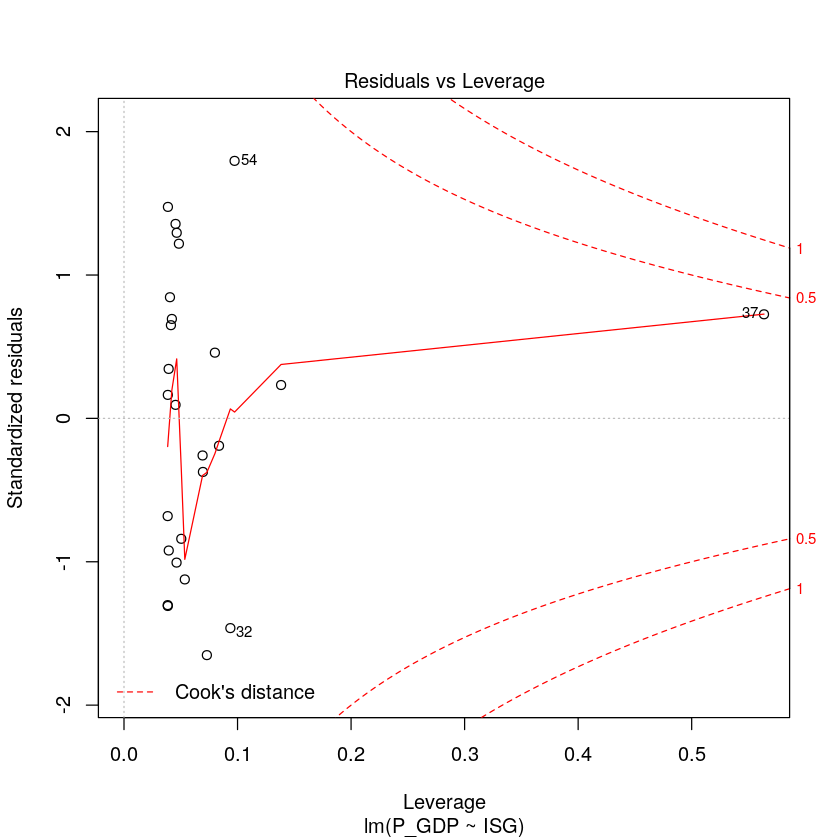

In [17]:
m <- lm(P_GDP ~ ISG, data=data.logdiff)
summary(m)
plot(m)

In [18]:
data.logdiff['37',]

,year,ISG,TO,TI,P_GDP,EI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,1996,-1.896908,-2.133408,-0.3900971,0.1808243,-0.1962229
